In [2]:
# import sys
# sys.path.append('/content/Rethinking-the-Usage-of-Normalization-and-Dropout-in-the-Training-of-Deep-Neural-Networks/')

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchsummary import summary
from models.resnet import resnet110, resnet110_ic
from models.densenet import densenet40, densenet40_ic
from models.vgg import vgg16_bn
from train.training import Learner
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# ResNet

In [2]:
# Train resnet110 on CIFAR10
model = resnet110(num_classes=10)
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar10', train_config=train_config)
res = learner.train()

INFO: Creating resnet110 model
INFO: Loading CIFAR10 training dataset
Files already downloaded and verified
INFO: Loading CIFAR10 test dataset
Files already downloaded and verified


  0%|                                                   | 0/200 [00:00<?, ?it/s]

current lr 1.00000e-03


  0%|                                                   | 0/200 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [3]:
# Train resnet110_ic on CIFAR10
model = resnet110_ic(num_classes=10)
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar10', train_config=train_config)
res = learner.train()

INFO: Creating resnet110 model with IC layer
INFO: Loading CIFAR10 training dataset
Files already downloaded and verified
INFO: Loading CIFAR10 test dataset
Files already downloaded and verified


  0%|                                                   | 0/200 [00:00<?, ?it/s]

current lr 1.00000e-03


  0%|                                                   | 0/200 [00:02<?, ?it/s]
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/alextrasza/opt/anaconda3/lib/python3.8/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/alextrasza/opt/anaconda3/lib/python3.8/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "/Users/alextrasza/opt/anaconda3/lib/python3.8/site-packages/torch/__init__.py", line 721, in <module>
    import torch.utils.data
  File "/Users/alextrasza/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/__init__.py", line 38, in <module>
    from torch.utils.data.dataloader_experimental import DataLoader2
  File "/Users/alextrasza/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader_experimental.py", line 11, in <module>
    from torch.utils.data.datapipes.iter import IterableWrapper
  File "/Users/alextrasza/

KeyboardInterrupt: 

In [5]:
# Train resnet110 on CIFAR100
model = resnet110(num_classes=100)
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar100', train_config=train_config)
res = learner.train()

INFO: Creating resnet110 model
INFO: Loading CIFAR100 training dataset
Files already downloaded and verified
INFO: Loading CIFAR100 test dataset
Files already downloaded and verified


  0%|                                                   | 0/200 [00:00<?, ?it/s]

current lr 1.00000e-03


  0%|                                                   | 0/200 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [6]:
# Training resnet110 on CIFAR100
model = resnet110(num_classes=100)
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar100', train_config=train_config)
res = learner.train()

INFO: Creating resnet110 model
INFO: Loading CIFAR100 training dataset
Files already downloaded and verified
INFO: Loading CIFAR100 test dataset
Files already downloaded and verified


  0%|                                                   | 0/200 [00:00<?, ?it/s]

current lr 1.00000e-03
Epoch: [0][0/782]	Loss 19.1232	Prec@1 0.000


  0%|                                                   | 0/200 [00:10<?, ?it/s]


KeyboardInterrupt: 

Best accuracy of resnet110: 93.19
Best accuracy of resnet110 with IC layer: 93.56


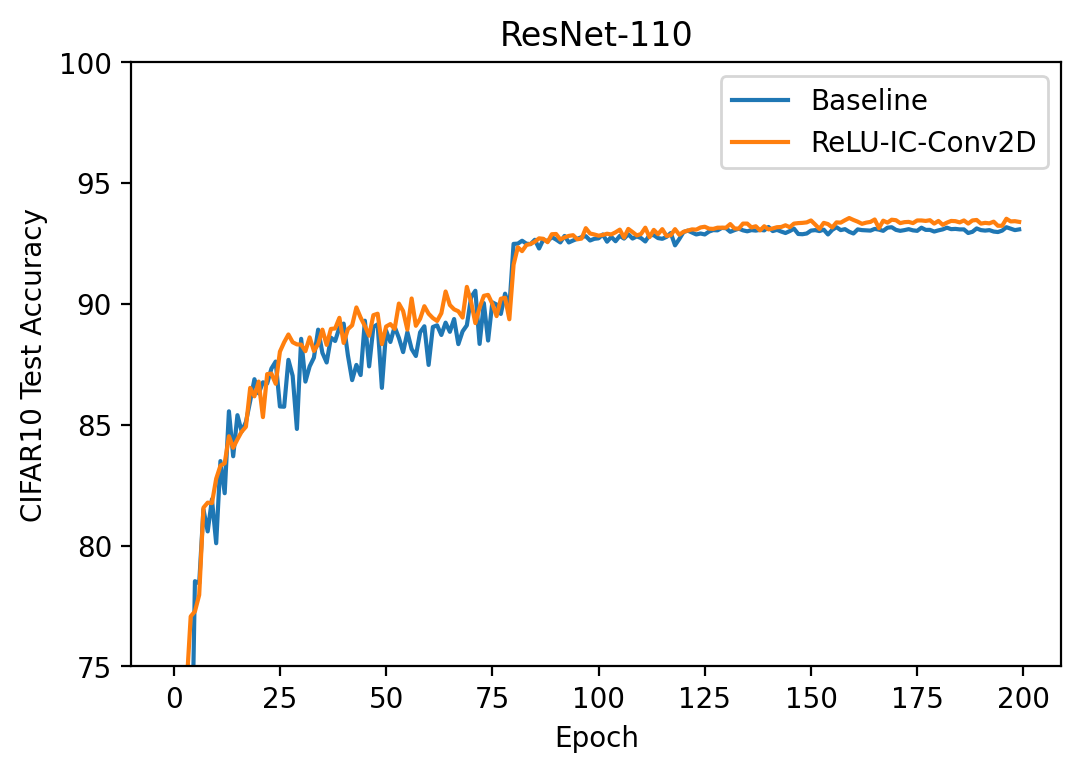

In [7]:
# plot results of cifar10
res = np.load('./res/cifar10_resnet110.npy')
res_ic = np.load('./res/cifar10_resnet110_ic.npy')
plt.figure(dpi=200)
plt.plot(res)
plt.plot(res_ic)
plt.ylim([75,100])
plt.legend(['Baseline','ReLU-IC-Conv2D'])
plt.ylabel('CIFAR10 Test Accuracy')
plt.xlabel('Epoch')
plt.title('ResNet-110')
plt.savefig('./figures/resnet_110_cifar10.png')
print(f"Best accuracy of resnet110: {np.max(res)}")
print(f"Best accuracy of resnet110 with IC layer: {np.max(res_ic)}")

Best accuracy of resnet110: 71.11
Best accuracy of resnet110 with IC layer: 72.47


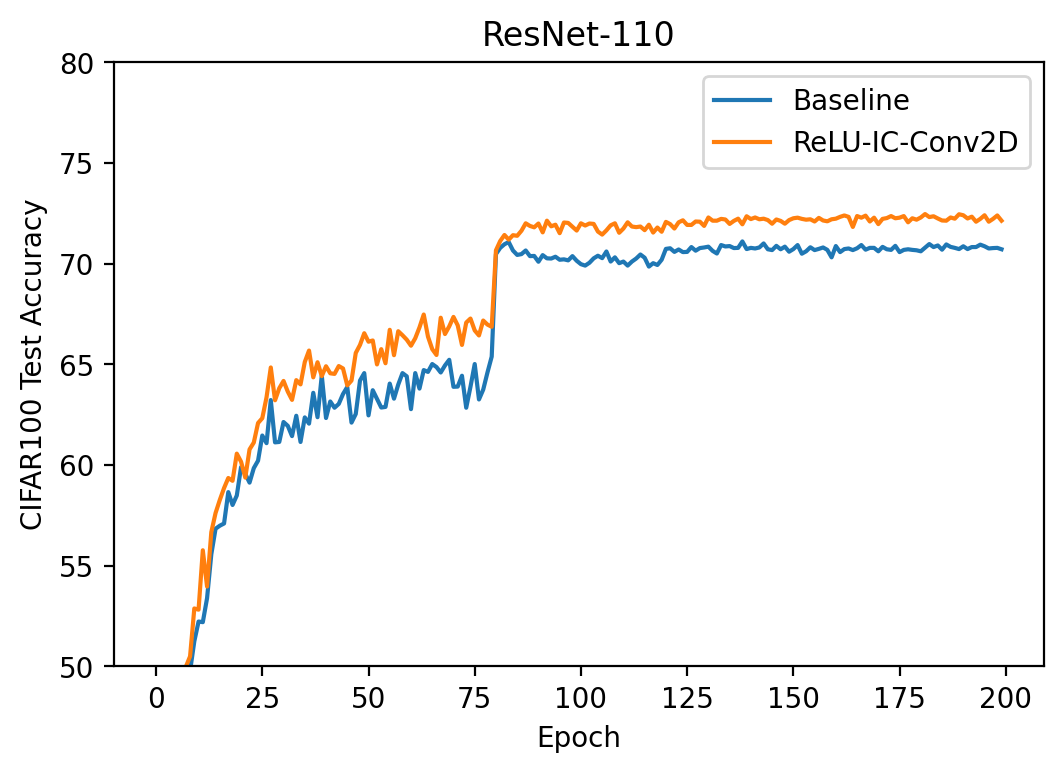

In [8]:
# plot results of cifar100
res = np.load('./res/cifar100_resnet110.npy')
res_ic = np.load('./res/cifar100_resnet110_ic.npy')
plt.figure(dpi=200)
plt.plot(res)
plt.plot(res_ic)
plt.ylim([50,80])
plt.legend(['Baseline','ReLU-IC-Conv2D'])
plt.ylabel('CIFAR100 Test Accuracy')
plt.xlabel('Epoch')
plt.title('ResNet-110')
plt.savefig('./figures/resnet_110_cifar100.png')
print(f"Best accuracy of resnet110: {np.max(res)}")
print(f"Best accuracy of resnet110 with IC layer: {np.max(res_ic)}")

# DenseNet

In [6]:
# Train densenet40 on CIFAR10
model = densenet40(10)
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar10', train_config=train_config)
# res = learner.train()

INFO: Creating densenet40 model
INFO: Loading CIFAR10 training dataset
Files already downloaded and verified
INFO: Loading CIFAR10 test dataset
Files already downloaded and verified


In [7]:
# Train densenet40 on CIFAR10
model = densenet40_ic(10)
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar10', train_config=train_config)
# res = learner.train()

INFO: Creating densenet40 model with IC layer
INFO: Loading CIFAR10 training dataset
Files already downloaded and verified
INFO: Loading CIFAR10 test dataset
Files already downloaded and verified


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cifar10_densenet40 = np.load('./res/cifar10_densenet40.npy')
cifar10_densenet40_ic = np.load('./res/cifar10_densenet40_ic.npy')

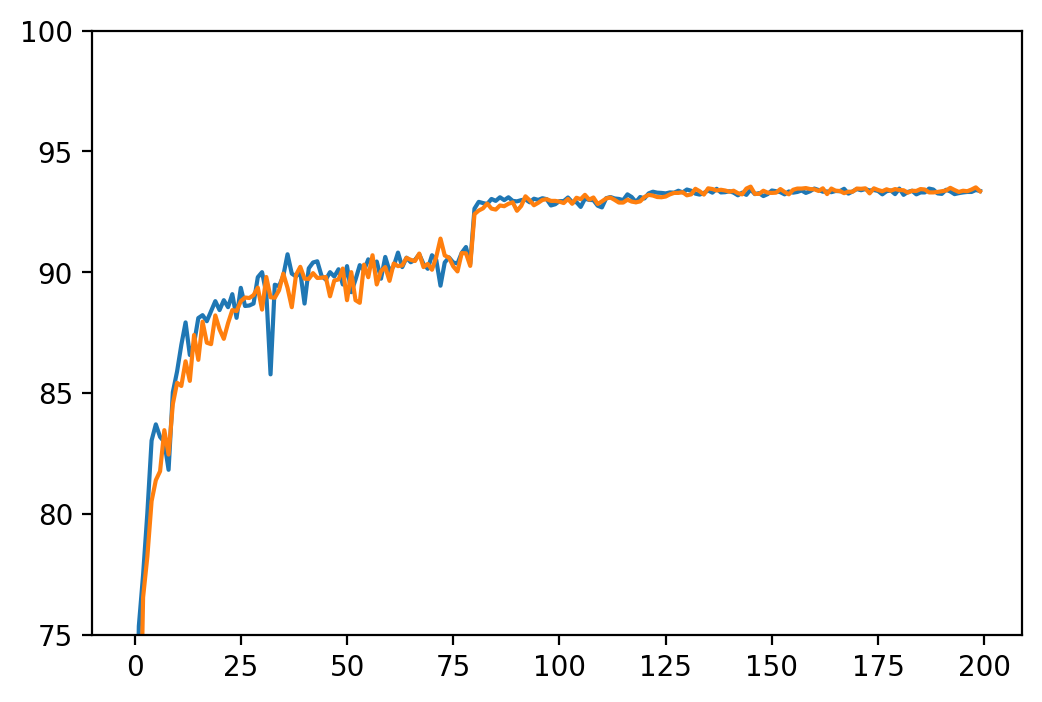

In [5]:
plt.figure(dpi=200)
plt.ylim([75,100])
plt.plot(cifar10_densenet40)
plt.plot(cifar10_densenet40_ic)

# VGG net

In [ ]:
# Train resnet110 on CIFAR10
model = resnet110(num_classes=10)
lr = 0.001
epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = lr, weight_decay=1e-4)
loss_fn = nn.CrossEntropyLoss().cuda()
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[80,120,160], gamma=0.1)

train_config = {'model':model,
                'loss_fn':loss_fn,
                'optim':optimizer,
                'scheduler':lr_scheduler,
                'epochs':epochs}

learner = Learner(task='cifar10', train_config=train_config)
res = learner.train()

INFO: Creating resnet110 model
INFO: Loading CIFAR10 training dataset
Files already downloaded and verified
INFO: Loading CIFAR10 test dataset
Files already downloaded and verified


  0%|                                                   | 0/200 [00:00<?, ?it/s]

current lr 1.00000e-03
